In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import bartlett
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("../data/profiles-v2.csv")
# data.head(1)

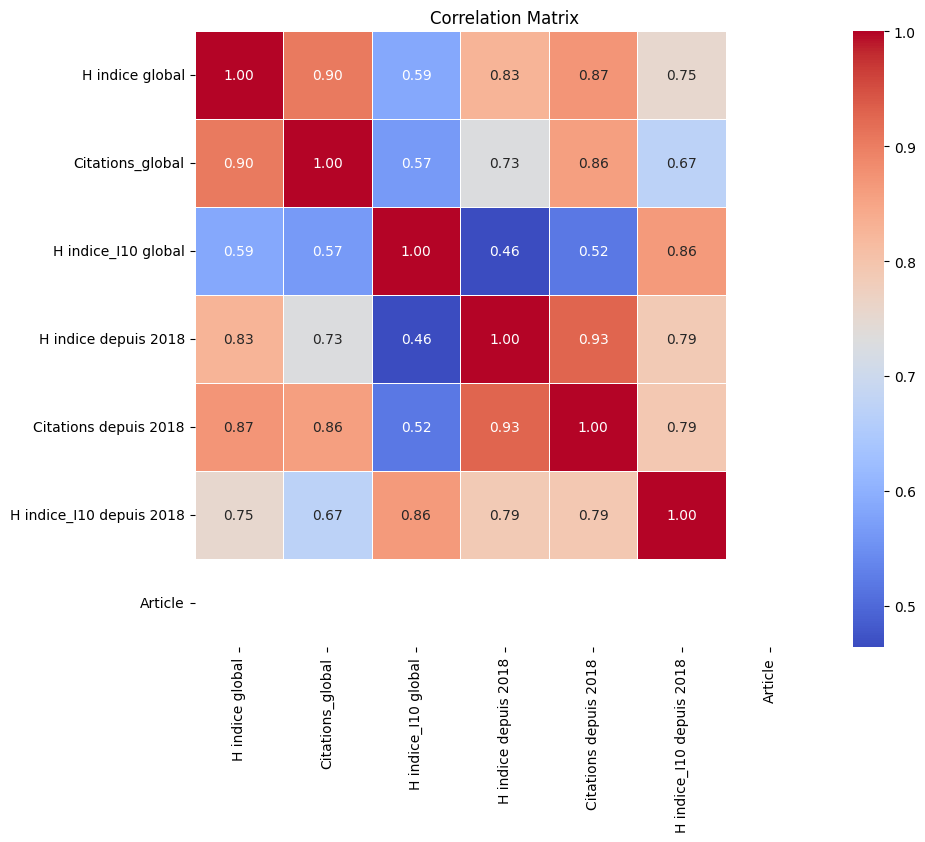

In [3]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Chaque entrée dans la matrice de corrélation représente le coefficient de corrélation entre deux variables. Le coefficient de corrélation est une mesure statistique qui quantifie le degré selon lequel deux variables évoluent l'une par rapport à l'autre. Il varie de -1 à 1, où :

- 1 indique une corrélation positive parfaite (quand une variable augmente, l'autre variable augmente également proportionnellement),
- -1 indique une corrélation négative parfaite (quand une variable augmente, l'autre variable diminue proportionnellement),
- 0 indique aucune corrélation linéaire.

# Interprétation:
- Après avoir examiné la matrice de corrélation, on peut conclure qu'il existe une relation linéaire entre la variable dépendante `Citations globales` et les variables indépendantes `H Indice global`, `Citations depuis 2018` et `H Indice depuis 2018`. Cela est indiqué par des coefficients de corrélation supérieurs à 0.7, s'approchant de 1.
- De plus, il existe également une forte corrélation entre les variables `Citations depuis 2018` et `H Indice depuis 2018` avec un coefficient de 0.93.
- Il existe une relation faible entre les variables `Citations depuis 2018` et `H indice_cl10 global` avec un coefficient de 0.52, ainsi qu'entre les variables `H Indice depuis 2018` et `H indice_cl10 global` avec un coefficient de 0.4.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


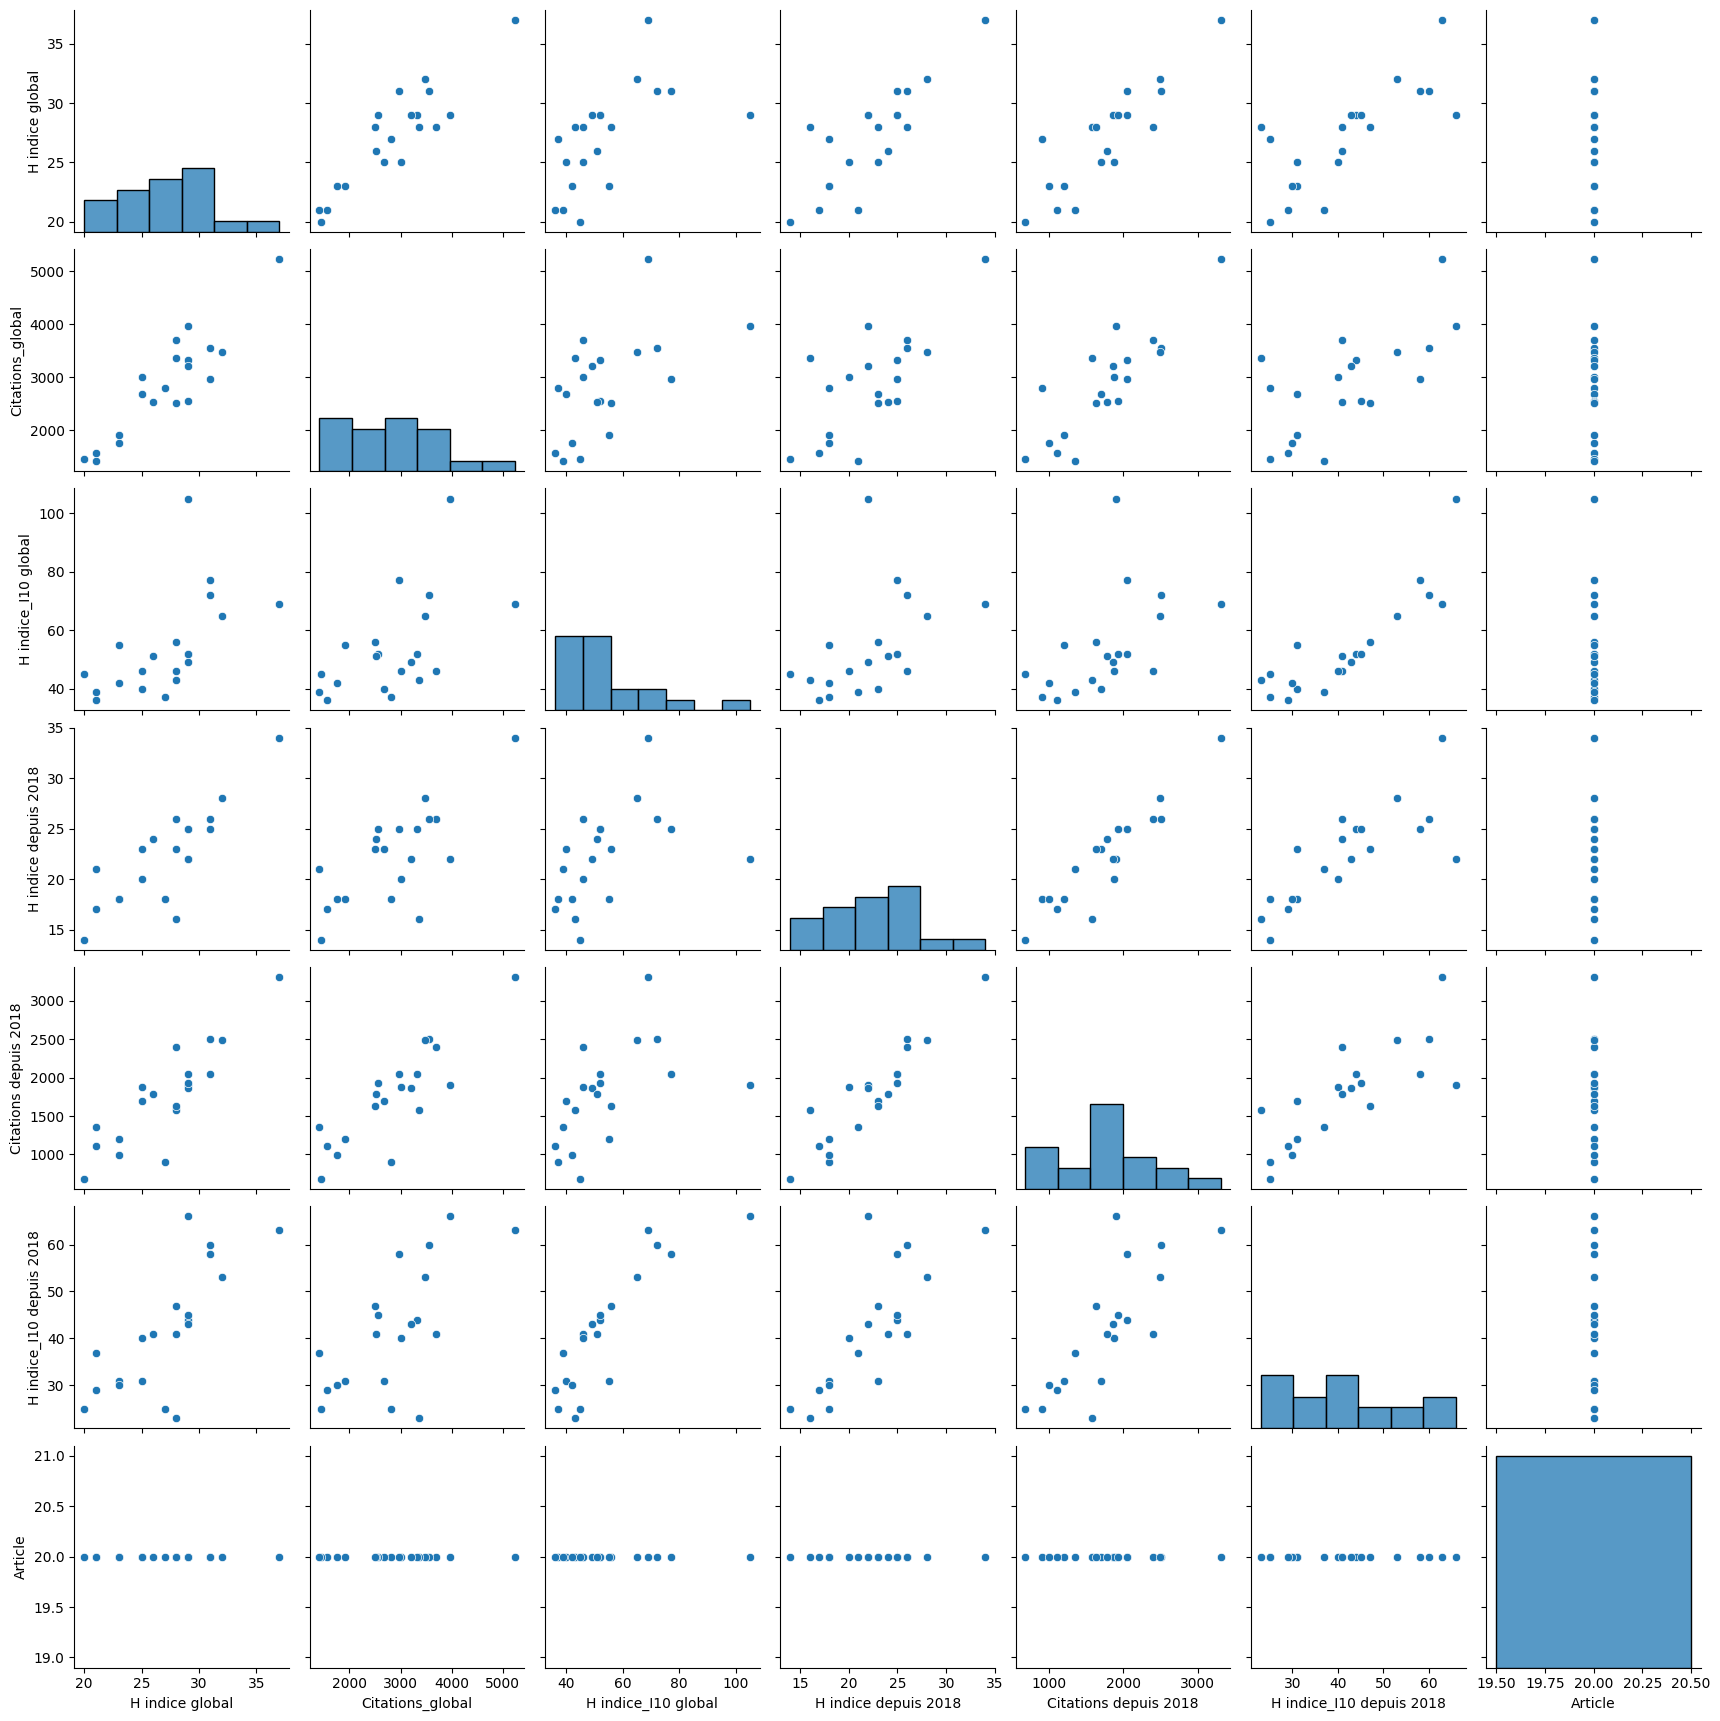

In [4]:
sns.pairplot(numeric_data)
plt.show()

# Interprétation :

- La direction et la forme des points indiquent la nature de la relation :
    - `Pente Positive` : À mesure qu'une variable augmente, l'autre a tendance à augmenter.
    - `Pente Négative` : À mesure qu'une variable augmente, l'autre a tendance à diminuer.
    - `Aucun Modèle Clair` : Il pourrait ne pas y avoir de relation linéaire forte.

- La densité et la dispersion des points dans les graphiques de dispersion indiquent la force de la relation entre les variables.
- Si les points se regroupent étroitement autour d'une ligne, cela suggère une corrélation forte.
  - par example `citaion global` et `H indec global`
- Lorsque les points dans un graphique de dispersion sont dispersés sans tendance ou motif clair, cela suggère l'absence de relation linéaire. Les variables peuvent être faiblement corrélées ou avoir une relation non linéaire.
  - par example `H indie_Ccl10 global` avec `citaion global` et `H indec global`

In [15]:
numeric_data.head(1)

,H indice global,Citations_global,H indice_I10 global,H indice depuis 2018,Citations depuis 2018,H indice_I10 depuis 2018,Article
0,37,5231,69,34,3308,63,20


In [7]:

# nettoyage des données
numeric_data.fillna(numeric_data.mean(), inplace = True)
X = numeric_data[[
    'H indice depuis 2018',
    'Citations depuis 2018',
    'H indice global'
]]
y = numeric_data['Citations_global']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Ensemble d'entraînement : ")
print(X_train)
print('_________________________________________________________________\n')
print(f"Ensemble de test : ")
print(y_train)

Ensemble d'entraînement : 
    H indice depuis 2018  Citations depuis 2018  H indice global
8                     20                   1875               25
5                     16                   1571               28
11                    23                   1693               25
3                     26                   2502               31
18                    14                    679               20
16                    18                    992               23
13                    24                   1785               26
2                     26                   2399               28
9                     25                   2052               31
19                    21                   1349               21
4                     28                   2490               32
12                    25                   1928               29
7                     22                   1858               29
10                    18                    899               2

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

R1 = r2_score(y_test, y_pred)

print(f"Coefficient de détermination -> R² = {R1} ")

Coefficient de détermination -> R² = 0.8586833570479674 


# Interprétation :
Le coefficient de détermination (R²) est très proche de 1 (0,8586833570479674), ce qui signifie que votre modèle explique pratiquement toute la variance de la variable dépendante (Ladder score).

En d'autres termes, environ 85,86% de la variabilité de la variable dépendante est expliquée par les variables indépendantes ('H indice depuis 2018', 'Citations depuis 2018', 'H indice global'). Il s'agit d'un ajustement extrêmement précis.

In [34]:
#code ici
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()

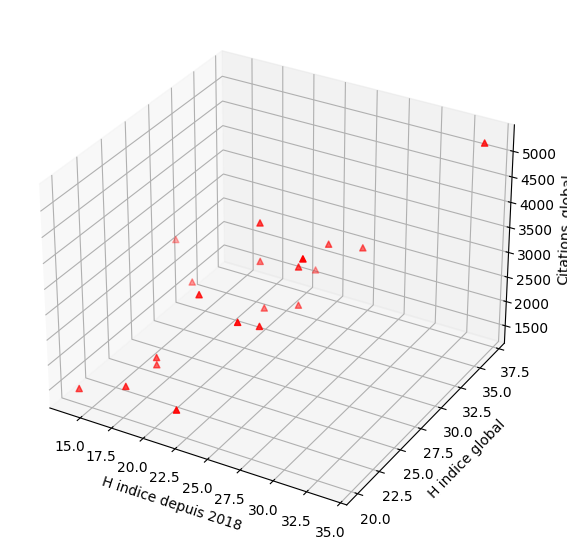

In [35]:
import matplotlib.pyplot as plt

# [
#     'H indice depuis 2018',
#     'Citations depuis 2018',
#     'H indice global'
# ]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,2,1, projection='3d')

# Scatter plot with three dimensions
scatter = ax.scatter(
    numeric_data["H indice depuis 2018"],
    numeric_data["H indice global"],
    numeric_data["Citations_global"],
    c="r",
    marker='^'
)

# Set labels for the first subplot
ax.set_xlabel('H indice depuis 2018')
ax.set_ylabel('H indice global')
ax.set_zlabel('Citations_global')

plt.show()


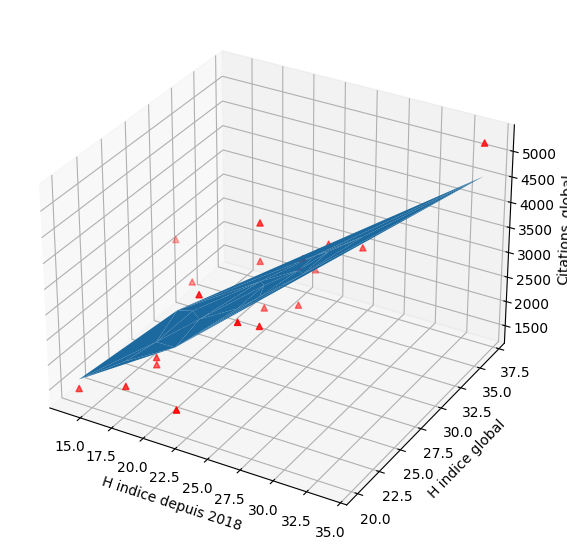

In [37]:
Y_predict = model2.predict(X)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,2,1, projection='3d')

# Scatter plot with three dimensions
scatter = ax.scatter(
    numeric_data["H indice depuis 2018"],
    numeric_data["H indice global"],
    numeric_data["Citations_global"],
    c="r",
    marker='^'
)

# Set labels for the first subplot
ax.set_xlabel('H indice depuis 2018')
ax.set_ylabel('H indice global')
ax.set_zlabel('Citations_global')

ax.plot_trisurf(
    numeric_data["H indice depuis 2018"],
    numeric_data["H indice global"],
    Y_predict)

plt.show()
